# **Lab2.2 : Image Enhancement with Statistical Operation** 

In this lab, you will execute two techniques: Image Histogram Equalization and Histogram Matching. Additionally, you will explore the pixel values of the image through a histogram.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

## **Histogram Equalization**
Read an image using OpenCV (Use your own image).

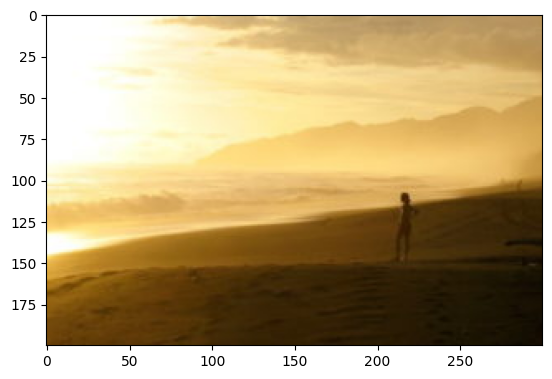

In [2]:
### START CODE HERE ###
img = cv2.imread("image/images1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
### END CODE HERE ###

Complete the `plot_histogram()` function below. This function returns the histogram of an image's pixel values, using `cv2.calcHist()`.

In [180]:
### START CODE HERE ###
def plot_histogram(image):
    colors = ('r', 'g', 'b')
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image],[i],None,[256],[0,256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    plt.show()
    return hist
### END CODE HERE ###

Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-2.png](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/2-1.png?raw=true)
</details>

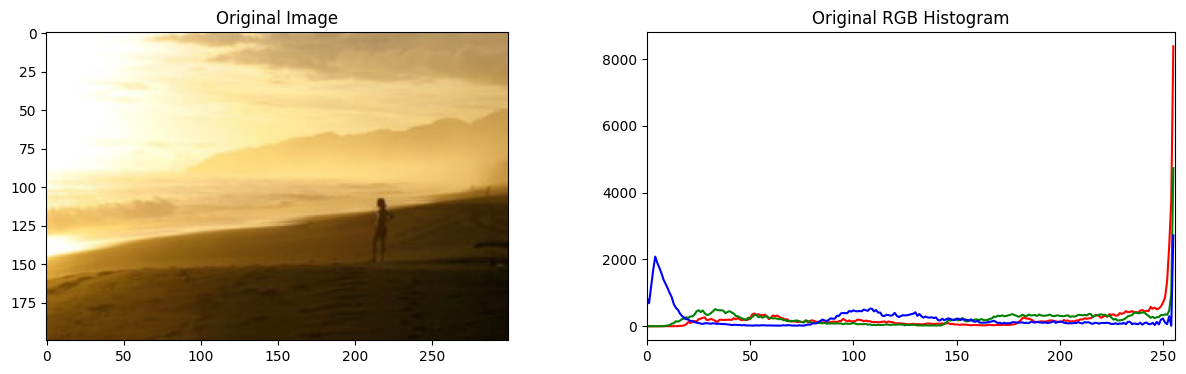

In [183]:
### START CODE HERE ###
fig, axs = plt.subplots(1,2, figsize=(15, 4))
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[1].set_title("Original RGB Histogram")
plot_histogram(img)
# axs[1].imshow(plot_histogram(img))
plt.show()
### END CODE HERE ###

Now let's equalize the histogram of all channel using `cv2.equalizeHistogram()`<br/>
Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel that that has been equalized.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/2-2.png?raw=true)
</details>

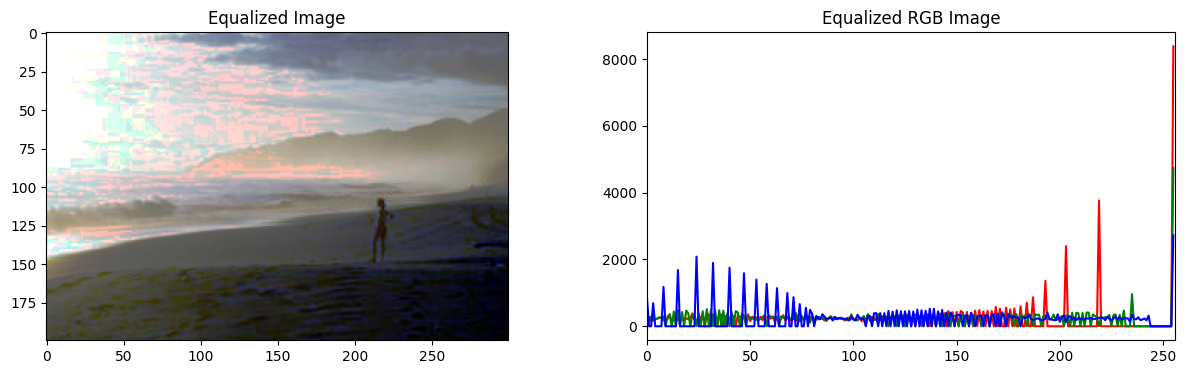

In [182]:
### START CODE HERE ###
fig, axs = plt.subplots(1,2, figsize=(15, 4))
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)

img_rgb_eq = cv2.merge((r_eq, g_eq, b_eq))
axs[0].set_title("Equalized Image")
axs[0].imshow(img_rgb_eq)
axs[1].set_title("Equalized RGB Image")
plot_histogram(img_rgb_eq)
plt.show()
### END CODE HERE ###

## **Image Histogram Matching**
Read 2 images using OpenCV. Use your own images. One image will be the input image and the other will be the template image.

In [6]:
### START CODE HERE ###


img1 = cv2.imread("image/images1.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("image/images2.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


### END CODE HERE ###

Let's explore 2 images. Use suplot to plot :
- An image
- PDF(Probability Density Function) of each channel
- CDF(Cumulative Distribution Function) of each channel 

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/2-3.png?raw=true)
</details>

Text(0.5, 1.0, 'CDF')

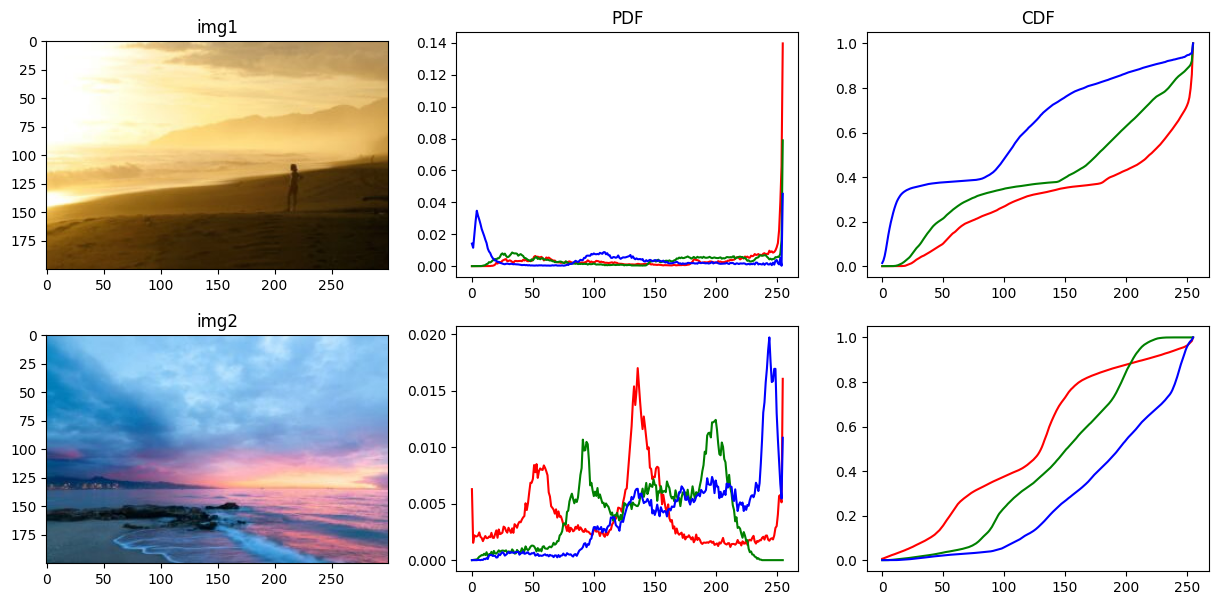

In [162]:
### START CODE HERE ###
fig, axs = plt.subplots(2,3, figsize=(15, 7))
axs[0][0].imshow(img1)
axs[0][0].set_title("img1")
axs[1][0].imshow(img2)
axs[1][0].set_title("img2")


def pdf_calculate(image):
    pdfs = []
    for i in range(3):  #เอา RGB bin = 256 คือแกน x ที่เห็น ส่วน range คือขอบเขตเส้นกราฟที่จะให้เห็น ทั้งช่องภาพ
        hist, bins = np.histogram(image[:, :, i], bins=256, range=(0, 256)) #ใช้ desity = true ก็ได้ เพราะมันเอาค่าจุดสีที่นับได้ หารด้วยจำนวน px ทั้งหมดของภาพนั้น เช่น 847/(200x300) => 0.01411667
        #Normalized Histogram
        pdfs.append(hist/(image.shape[0]*image.shape[1])) #
    # print(hist/(image.shape[0]*image.shape[1]))
    return pdfs

def cdf_calculate(pdf):
    cdfs = []
    for channel_pdf in pdf:
        cdf = np.cumsum(channel_pdf) #บวกสะสม
        cdfs.append(cdf)
    # print(cdf)
    return cdfs
    
colors = ['r', 'g', 'b']
img1_pdf = pdf_calculate(img1)
img1_cdf = cdf_calculate(img1_pdf)
img2_pdf = pdf_calculate(img2)
img2_cdf = cdf_calculate(img2_pdf)
for i in range(3):
    axs[0][1].plot(img1_pdf[i], color=colors[i])
    axs[0][2].plot(img1_cdf[i], color=colors[i])
    axs[1][1].plot(img2_pdf[i], color=colors[i])
    axs[1][2].plot(img2_cdf[i], color=colors[i])
axs[0][1].set_title("PDF")
axs[0][2].set_title("CDF")


### END CODE HERE ###

Perform Histogram matching in the cell below.
Show the result like the reference image below.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/2-4.png?raw=true)
</details>

Text(0.5, 1.0, 'Histogram matching')

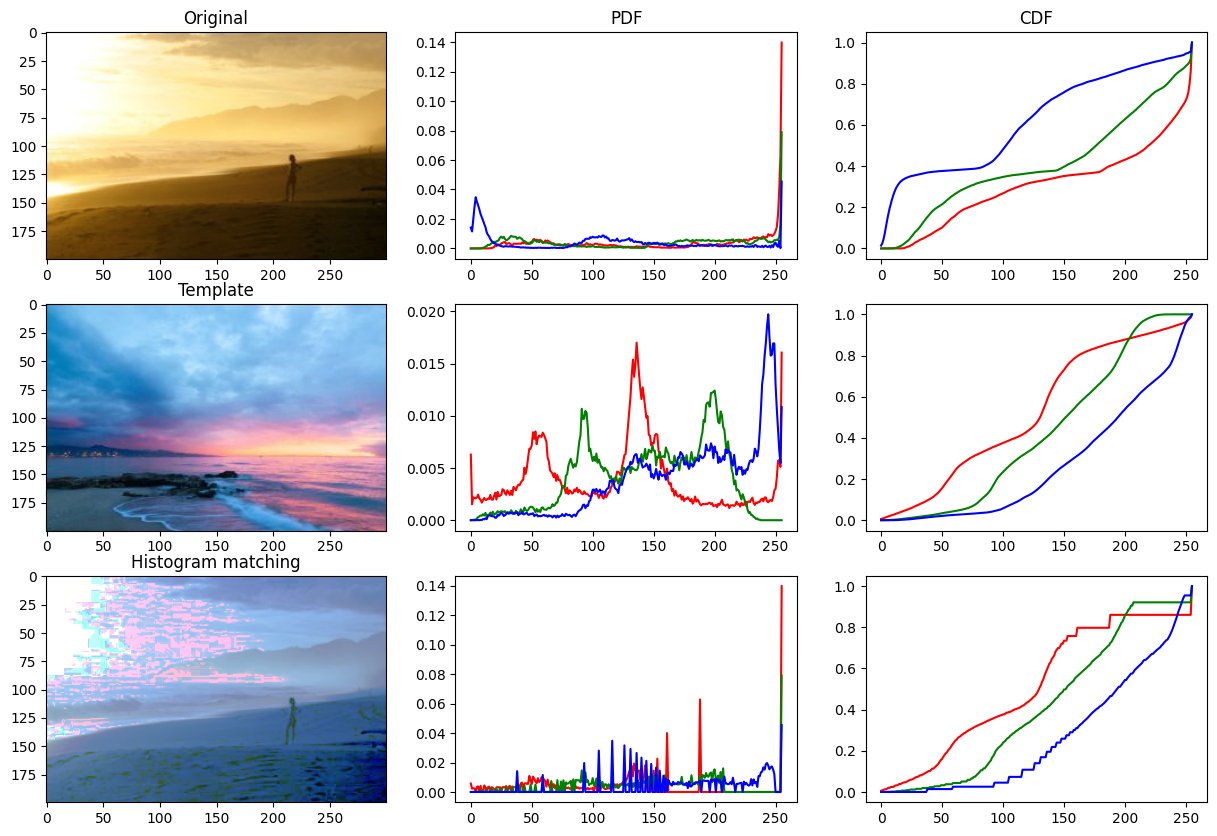

In [167]:
### START CODE HERE ###

#อ้างอิงวิธีการ Histogram Matching https://github.com/adenarayana/digital-image-processing/blob/main/Python%23023%20Histogram%20Matching.ipynb

fig, axs = plt.subplots(3,3, figsize=(15, 10))
axs[0][0].imshow(img1)
axs[0][0].set_title("Original")
axs[1][0].imshow(img2)
axs[1][0].set_title("Template")

colors = ['r', 'g', 'b']
img1_pdf = pdf_calculate(img1)
img1_cdf = cdf_calculate(img1_pdf)
img2_pdf = pdf_calculate(img2)
img2_cdf = cdf_calculate(img2_pdf)
for i in range(3):
    axs[0][1].plot(img1_pdf[i], color=colors[i])
    axs[0][2].plot(img1_cdf[i], color=colors[i])
    axs[1][1].plot(img2_pdf[i], color=colors[i])
    axs[1][2].plot(img2_cdf[i], color=colors[i])
axs[0][1].set_title("PDF")
axs[0][2].set_title("CDF")

img1_pdf = pdf_calculate(img1)
img1_cdf = cdf_calculate(img1_pdf)
img2_pdf = pdf_calculate(img2)
img2_cdf = cdf_calculate(img2_pdf)


# histogram matching
def histMatch(cdfInput, cdfTemplate, imageInput):
    pixelValues = np.arange(256)
    new_pixels = np.interp(cdfInput, cdfTemplate, pixelValues)
    imageMatch = (np.reshape(new_pixels[imageInput.ravel()], imageInput.shape)).astype(np.uint8)
    return imageMatch


# create a matrix for result
imageResult = np.zeros((img1.shape)).astype(np.uint8)

# cdf and histogram
for channel in range(3):
    cdfInput = img1_cdf[channel]
    cdfTemplate = img2_cdf[channel]
    imageResult[:,:,channel] = histMatch(cdfInput, cdfTemplate, img1[:,:,channel])

axs[2][0].imshow(imageResult)

colors = ['r', 'g', 'b']
imgResult_pdf = pdf_calculate(imageResult)
imgResult_cdf = cdf_calculate(imgResult_pdf)
for i in range(3):
    axs[2][1].plot(imgResult_pdf[i], color=colors[i])
    axs[2][2].plot(imgResult_cdf[i], color=colors[i])
axs[2][0].set_title("Histogram matching")

### END CODE HERE ###

---

## **Questions**
1. If an image having a dense histogram concentrated at high intensity, how would an image appear when you display on a device.
2. If we want to enhance the image explained in question 1 using histogram matching, how would the histogram of the template image should be?
3. How would we enhance an image having too bright in some area and too dark in another area?

In [ ]:
# 1. If an image having a dense histogram concentrated at high intensity, how would an image appear when you display on a device.
# ตอบ จะสว่างมากๆๆๆ ออกไปทางสีขาว

In [ ]:
# 2. If we want to enhance the image explained in question 1 using histogram matching, how would the histogram of the template image should be?
# ตอบ ควรเลือก Template ที่มีการกระจายของ Histogram เท่าๆกัน ไปในทุกๆ range ของ intensity (เพราะมันจะพยายาม Match ให้ใกล้ที่สุด)

In [ ]:
# 3. How would we enhance an image having too bright in some area and too dark in another area?
# ตอบ ใช้ Histogram Equalization เพื่อกระจาย intensity ให้ไปทั่วๆ range ของแกน x